In [175]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats

# Q1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data.

In [136]:
claims_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/My Projetcs/Alabs Solving Assignments/To SOlve ALAB Assignments/Python for data science/Case Study 3 - Insurance Claims Case Study/claims.csv")
claims_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [137]:
cust_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/My Projetcs/Alabs Solving Assignments/To SOlve ALAB Assignments/Python for data science/Case Study 3 - Insurance Claims Case Study/cust_demographics.csv")
cust_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [138]:
# merging datafiles. 
df = pd.merge(left =  cust_data,
              right = claims_data,
              left_on = "CUST_ID",
              right_on = "customer_id",
              how = "inner",
              indicator = True
             )
data = df
data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,_merge
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,both
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,both
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,both
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,both
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No,both
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No,both
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No,both
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No,both


# Q2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [139]:
S=data.dtypes[data.dtypes!='object'].index.values


In [140]:
mean=DataFrame({'mean':data[S].mean()})                  # mean
std_dev=DataFrame({'std_dev':data[S].std()})             #std_dev
missing= DataFrame({'missing':data[S].isnull().sum()})   # missings
minimum=DataFrame({'min':data[S].min()})                 # min
maximum=DataFrame({'max':data[S].max()})                 # max
Audit =pd.concat([mean,std_dev,missing,minimum,maximum],axis=1,sort = False)

In [141]:
from google.colab import files

Audit.to_csv('DataAudit.csv') 
files.download('DataAudit.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [142]:
data=df.drop(columns = '_merge')
data.dropna(inplace = True)

In [143]:
DA = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/My Projetcs/Alabs Solving Assignments/To SOlve ALAB Assignments/Python for data science/Case Study 3 - Insurance Claims Case Study/DataAudit.csv")
DA.rename(columns = {'Unnamed: 0':''})

,,mean,std_dev,missing,min,max
0,CUST_ID,5.076790e+07,2.849625e+07,0,154557.0,99961993.0
1,claim_id,4.891553e+07,2.912818e+07,0,26832.0,99775483.0
2,customer_id,5.076790e+07,2.849625e+07,0,154557.0,99961993.0
3,total_policy_claims,1.586977e+00,1.146859e+00,10,1.0,8.0
4,_merge,NaN,NaN,0,NaN,NaN


In [144]:
Audit

,mean,std_dev,missing,min,max
CUST_ID,5.076790e+07,2.849625e+07,0,154557.0,99961993.0
claim_id,4.891553e+07,2.912818e+07,0,26832.0,99775483.0
customer_id,5.076790e+07,2.849625e+07,0,154557.0,99961993.0
total_policy_claims,1.586977e+00,1.146859e+00,10,1.0,8.0
_merge,NaN,NaN,0,NaN,NaN


# Q3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the sign.

In [145]:
data['claim_amount'] = data['claim_amount'].astype(str)
data['claim_amount'] = data['claim_amount'].str.replace('$','')
data['claim_amount'] = pd.to_numeric(data['claim_amount'])
data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No


# Q4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [146]:
data['Flag'] = np.where(data.police_report == 'Unknown',0,1)
data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,1
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,0
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,1
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,1
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,1
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,1
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,1
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,1


# Q5. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [147]:
data.drop_duplicates(subset = 'CUST_ID',keep = 'last')

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,1
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,0
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,1
5,47830476,Female,01-May-86,MA,413-187-7945,Silver,91609100,47830476,Natural causes,04/12/2017,Auto,Unknown,Material only,1440.0,1.0,No,0
7,19269962,Male,13-May-77,NV,956-871-8691,Gold,39219616,19269962,Other causes,09/26/2018,Auto,No,Material only,2240.0,2.0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,1
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,1
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,1
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,1


# Q6. Check for missing values and impute the missing values with an appropriate value.(mean for continuous and mode for categorical)

In [148]:
data.isnull().sum() 

CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
Flag                   0
dtype: int64

In [149]:
data.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount           float64
total_policy_claims    float64
fraudulent              object
Flag                     int64
dtype: object

In [150]:
data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,1
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,0
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,1
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,1
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,1


# Q7. Calculate the age of customers in years. Based on the age, categorize the customers 

In [151]:
curr_year = pd.to_datetime('today').year
dob_year = pd.DatetimeIndex(data['DateOfBirth']).year          #extract year from DateOfBirth
x = dob_year-100                                               # for the years which belongs to 60's
v = curr_year - x
y = curr_year - dob_year
data['age'] = (np.where(dob_year > curr_year,v,y))             

data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,age
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,1,42
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,0,51
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,1,37
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,1,37
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,1,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,1,40
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,1,25
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,1,31
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,1,57


In [152]:
# Creating Categories based on Age

data.loc[(data.age < 18),'AgeGroup'] = 'Children'
data.loc[(data.age >=18) & (data.age <30),'AgeGroup'] = 'Youth'
data.loc[(data.age >=30) & (data.age <60),'AgeGroup'] = 'Adult'
data.loc[(data.age >=60),'AgeGroup'] = 'Senior'

In [153]:
data    # created Age group colum with categories

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,age,AgeGroup
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,1,42,Adult
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,0,51,Adult
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,1,37,Adult
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,1,37,Adult
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,1,35,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,1,40,Adult
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,1,25,Youth
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,1,31,Adult
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,1,57,Adult


In [154]:
data.groupby(by = "AgeGroup").count()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,age
AgeGroup,,,,,,,,,,,,,,,,,,
Adult,756,756,756,756,756,756,756,756,756,756,756,756,756,756,756,756,756,756
Senior,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43
Youth,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212


# Q8. What is the average amount claimed by the customers from various segments?

In [155]:
data.groupby('Segment').mean()[['claim_amount']]

,claim_amount
Segment,
Gold,12723.927954
Platinum,12397.859420
Silver,12217.995298


# Q9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [156]:
data.loc[data.claim_date < "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum().add_prefix("Total_")

incident_cause
Total_Crime                  696900.0
Total_Driver error          3396330.0
Total_Natural causes        1242916.0
Total_Other causes          3972345.0
Total_Other driver error    3281514.0
Name: claim_amount, dtype: float64

# Q10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [157]:
print(data['incident_cause']. unique())

['Driver error' 'Crime' 'Other driver error' 'Natural causes'
 'Other causes']


In [158]:
print (data['State'].unique())

['VT' 'ME' 'TN' 'MA' 'NV' 'NH' 'AR' 'AK' 'ID' 'RI' 'KY' 'MD' 'MI' 'IL'
 'WA' 'SC' 'KS' 'IN' 'UT' 'AZ' 'IA' 'WI' 'WY' 'NY' 'LA' 'DE' 'GA' 'OH'
 'SD' 'WV' 'NJ' 'TX' 'CA' 'NC' 'MT' 'NM' 'OR' 'AL' 'ND' 'MN' 'MO' 'VA'
 'CO' 'OK' 'FL' 'NE' 'CT' 'MS' 'PA' 'HI']


In [159]:
data.loc[(data.incident_cause.str.lower().str.contains("driver", "Driver") & ((data.State == "TX") | (data.State == "DE") | (data.State == "AK"))),:].groupby(by = "State")["State"].count()

State
AK     9
DE    13
TX     9
Name: State, dtype: int64

# Q11. Draw a pie chart between the aggregated value of claim amount based on gender and segment.

In [160]:
gen_seg = data.groupby(by = ["gender","Segment"])["claim_amount"].sum().reset_index()        # grouping agg value based on gender & segment
gen_seg.head()

,gender,Segment,claim_amount
0,Female,Gold,1937899.0
1,Female,Platinum,2278700.0
2,Female,Silver,1739832.0
3,Male,Gold,2477304.0
4,Male,Platinum,1998561.5


In [161]:
result = gen_seg.pivot(index = "Segment", columns = "gender", values = "claim_amount")          # pivot table of gender and segment 
result

gender,Female,Male
Segment,,
Gold,1937899.0,2477304.0
Platinum,2278700.0,1998561.5
Silver,1739832.0,2157708.5


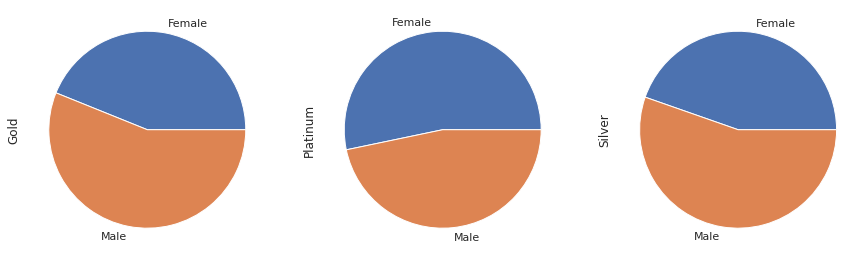

In [162]:
result.T.plot(kind = "pie", subplots = True, legend = False, figsize = (15,8))        # plotting pie chart
plt.show()

# Q12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [163]:
driver_issue = data.loc[data['incident_cause'].isin(['Driver error','Other driver error'])]
group_gender = driver_issue.groupby(['gender'])['claim_amount'].count().reset_index()
group_gender

,gender,claim_amount
0,Female,205
1,Male,265


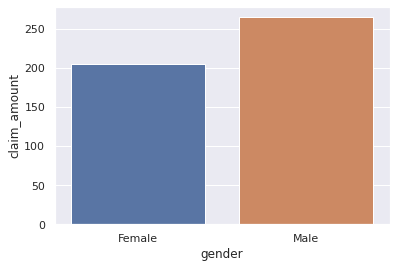

In [164]:
sns.barplot(x = "gender", y = "claim_amount", data = group_gender )
plt.show()      # plot shows that Male claimed most. 

# Q13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [165]:
data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,age,AgeGroup
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,1,42,Adult
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,0,51,Adult
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,1,37,Adult
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,1,37,Adult
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,1,35,Adult


In [166]:
max_fraud_claim = data.groupby(by = "AgeGroup")[["fraudulent"]].count().add_prefix("Total_")
max_fraud_claim

,Total_fraudulent
AgeGroup,
Adult,756
Senior,43
Youth,212


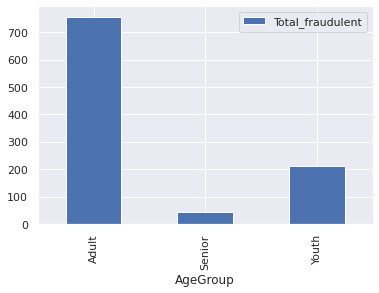

In [167]:
max_fraud_claim.plot(kind = 'bar')           # Adult had the most claims

# Q14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [168]:
data.head(5)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,age,AgeGroup
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,1,42,Adult
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,0,51,Adult
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,1,37,Adult
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,1,37,Adult
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,1,35,Adult


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011 entries, 0 to 1084
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1011 non-null   int64  
 1   gender               1011 non-null   object 
 2   DateOfBirth          1011 non-null   object 
 3   State                1011 non-null   object 
 4   Contact              1011 non-null   object 
 5   Segment              1011 non-null   object 
 6   claim_id             1011 non-null   int64  
 7   customer_id          1011 non-null   int64  
 8   incident_cause       1011 non-null   object 
 9   claim_date           1011 non-null   object 
 10  claim_area           1011 non-null   object 
 11  police_report        1011 non-null   object 
 12  claim_type           1011 non-null   object 
 13  claim_amount         1011 non-null   float64
 14  total_policy_claims  1011 non-null   float64
 15  fraudulent           1011 non-null   o

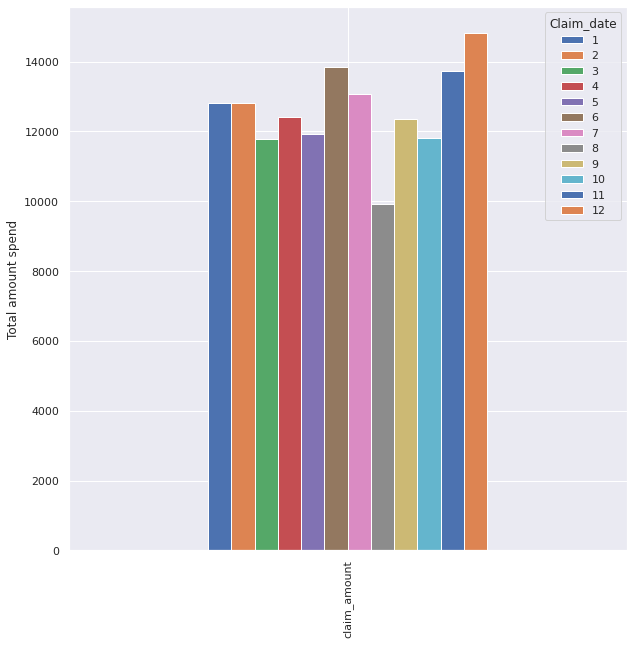

In [173]:
date = data['claim_date'] = pd.to_datetime(data['claim_date'])
month = data['Claim_date'] = data['claim_date'].dt.month
sns.set()
pd.pivot_table(data, columns ='Claim_date',values="claim_amount").plot(kind='bar', figsize= (10,10))
plt.ylabel('Total amount spend')
plt.show()

# Statistical Tests : 
16. Is there any similarity in the amount claimed by males and females?

In [174]:
claim_male = data['claim_amount'].loc[data['gender']=="Male"]

claim_female = data['claim_amount'].loc[data['gender']=="Female"]

print("The average amount claimed by males is {}".format(claim_male.mean()))

print("The average amount claimed by females is {}".format(claim_female.mean()))

The average amount claimed by males is 12855.763565891473
The average amount claimed by females is 12033.19393939394


**Two Sample t-Test(Independent)**

stats.ttest_ind(a=,b=)

*H0 : Amount Claimed by Males == Amount Claimed By Females*

*H1 : Amount Claimed by Males <> Amount Claimed by Females* 

In [176]:
eq_var = stats.ttest_ind(a= claim_male,
                b= claim_female,
                equal_var=True)    # equal variance
eq_var.statistic

0.9494491636619324

In [177]:
uneq_var = stats.ttest_ind(a= claim_male,
                b= claim_female,
                equal_var=False)    # UnEqual variance
uneq_var.statistic

0.9501848470702697

In [178]:
uneq_var.statistic - eq_var.statistic

0.0007356834083372954

In [179]:
t = eq_var.statistic

p = eq_var.pvalue

print(" For the above test, the t-score is {} and the p-value is {}".format(t,p))

if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')   

 For the above test, the t-score is 0.9494491636619324 and the p-value is 0.34261956549002026
We fail to reject null hypothesis


Since the significance value of the test is greater than 0.05, we can conclude that there is a similarity between amount claimed by males and females. 

# 17. Is there any relationship between age category and segment?

As age and segment are both categorical variables. We will be using Chi-Sq test. 

H0 : Observed == Expected (No relation between category and segment)

Ha : Observed != Expected (There is a realtionship between category and segment)

In [180]:
age_tab = pd.crosstab(data.AgeGroup, data.Segment, margins = True)
age_tab

Segment,Gold,Platinum,Silver,All
AgeGroup,,,,
Adult,266,254,236,756
Senior,14,14,15,43
Youth,67,77,68,212
All,347,345,319,1011


In [188]:
Chi_test2 = stats.chi2_contingency(observed= age_tab)

Chi_test2 


(1.2480798057134221,
 0.9986200524390884,
 9,
 array([[ 259.47774481,  257.98219585,  238.54005935,  756.        ],
        [  14.7586548 ,   14.6735905 ,   13.5677547 ,   43.        ],
        [  72.7636004 ,   72.34421365,   66.89218595,  212.        ],
        [ 347.        ,  345.        ,  319.        , 1011.        ]]))

In [189]:
print("The chi square stat is {} and the p value is {}".format(Chi_test[0],Chi_test[1]))

The chi square stat is 1.2480798057134221 and the p value is 0.9986200524390884


Since significance level is greated than 0.05, hence there is no relationship between age group and segment.

# 19. Is there any difference between age groups and insurance claims?

I would use ANOVA to help me understand how data different groups respond

*H0 : if mean Youth = Mean Adult (No difference between age groups & claims*

*Ha : if mean Youth =! Mean Adult (There is difference between age groups & claims*

In [195]:
Youth = data['total_policy_claims'].loc[data['AgeGroup']=="Youth"]
Adult = data['total_policy_claims'].loc[data['AgeGroup']=="Adult"]

In [196]:
anova = stats.f_oneway(Youth,Adult)      # Anova test 

In [198]:
f = anova.statistic          # f- Significance
p = anova.pvalue             # p-value
print("The f-value is {} and the p value is {}".format(f,p))
if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We do not reject null hypothesis')

The f-value is 0.794182985006073 and the p value is 0.3730601797365548
We do not reject null hypothesis


# 20. Is there any relationship between total number of policy claims and the claimed amount?

Since, both variables (total no of policies and claimed amount) are continuous in nature and we want to find out the relationship between them, I will be using Correlation test.

In [199]:
data.total_policy_claims.corr(other=data.claim_amount)

-0.018086586789599363

This negative value signifies that  total number of policy claims is inversely proportional to the claimed amount. 

Text(0, 0.5, 'Claim Amount')

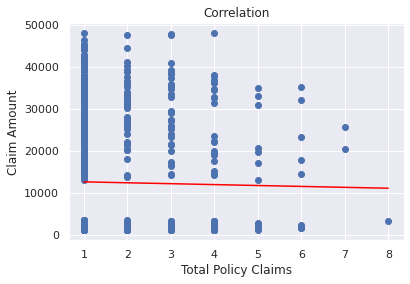

In [204]:
x = data.total_policy_claims
y = data.claim_amount

plt.scatter(x, y)   # plotting the data

# This will fit the best line into the graph
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')


# adds the title
plt.title('Correlation')
  
# Labelling axes
plt.xlabel('Total Policy Claims')
plt.ylabel('Claim Amount')

# Some heatmap on my own for further analysis... 

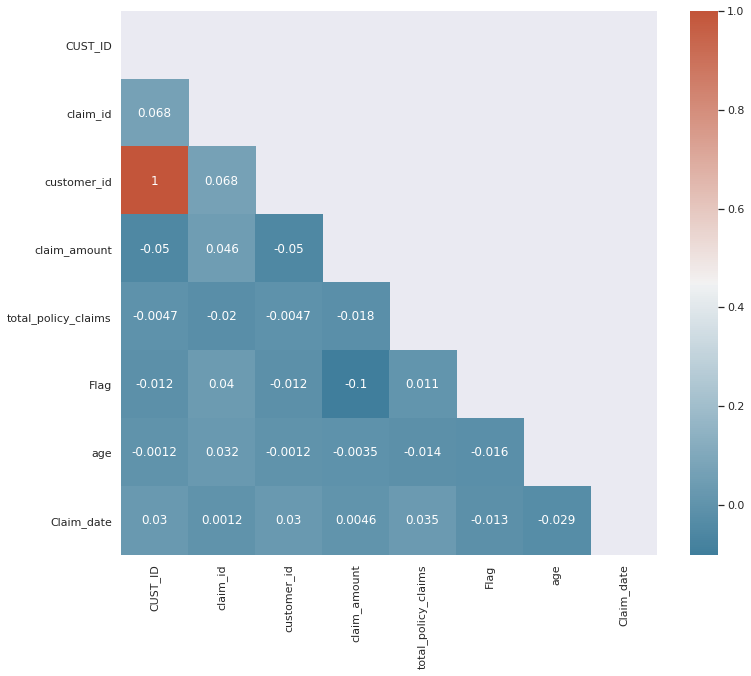

In [207]:
corr = data.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)